# Objective

To review the KNN algorithm for classification

## Preliminaries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, f1_score, classification_report

from sklearn.neighbors import KNeighborsClassifier

# Distance measures

## L2 norm

Given two vectors $\mathbf{a} = (x_1, y_1)$ and $\mathbf{b}=(x_2, y_2)$, the L2 norm between them is:

$$d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$$

## L1 norm

Given two vectors $\mathbf{a}$ and $\mathbf{b}$ the L1 norm between them is: $$ d = |x_2-x_1| + |y_2-y_1| $$

This is also referred to as the Manhattan distance

# The KNN algorithm

*Birds of the same feather flock together*

The best thing about KNN is that there is no model.

Once we fix a method to compute the distance between two examples in the feature space, we then look at $k$ nearest neighbors for each example in the validation set and assign it to the majority class within its neighborhood.

If $k=1$, for each example in the validation set, we compute its closest neighbor in the training set. Then, we assign this example to the corresponding class of the training example.

If $k=2$, for each example in the validation set, we compute its two closest neighbors in the training set. Then we assign this example to the majority class if it exists. [What do we do when there is a tie?](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

If $k=3$, we extract three closest neighbors in the training set and compute the majority class. 

Of course, the value of $k$ is estimated through hyperparameter tuning by looking at the highest validation accuracy.

A very good aspect of KNN is that it generalizes easily to situations where the target has more than 2 classes. Here, we take the majority class among the $k$ neighbors and assign the validation example to the majority class.

# Example: **Diabetes**

Let us see an example of two class classification

## Data

In [2]:
#data_file = "/content/drive/MyDrive/AI-ML/supervised-learning-revision/Day1/data/diabetes.csv"

In [ ]:
#diabetes_df = pd.read_csv(data_file)

In [3]:
diabetes_df = pd.read_csv("https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv")

In [4]:
diabetes_X, diabetes_y = diabetes_df.drop('Outcome', axis=1), diabetes_df.Outcome

In [5]:
diabetes_Xtrain, diabetes_Xvalid, diabetes_ytrain, diabetes_yvalid = train_test_split(diabetes_X,
                                                                                      diabetes_y,
                                                                                      test_size=0.2,
                                                                                      random_state=20130810)

In [6]:
sc = StandardScaler()

diabetes_scaledXtrain = sc.fit_transform(diabetes_Xtrain)
diabetes_scaledXvalid = sc.transform(diabetes_Xvalid)

## Model 1

In [7]:
learner_knn = KNeighborsClassifier(n_neighbors=3)

In [8]:
learner_knn.fit(diabetes_scaledXtrain, diabetes_ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [9]:
diabetes_scaledXvalid.shape

(154, 8)

In [10]:
%%time
learner_knn.score(diabetes_scaledXvalid, diabetes_yvalid)

CPU times: user 8.79 ms, sys: 132 µs, total: 8.92 ms
Wall time: 11.8 ms


0.7532467532467533

In [11]:
confusion_matrix(diabetes_yvalid,
                 learner_knn.predict(diabetes_scaledXvalid))

array([[89, 16],
       [22, 27]])

In [13]:
f1_score(diabetes_yvalid,
         learner_knn.predict(diabetes_scaledXvalid),
         average='macro')

0.7055152979066024

## Model 2

Hyperparameter tuning

In [14]:
k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]
training_accuracy, validation_accuracy, validation_f1score = [], [], []

In [15]:
%%time
for k in k_values:
  learner_knn = KNeighborsClassifier(n_neighbors=k)
  learner_knn.fit(diabetes_scaledXtrain, diabetes_ytrain)

  training_accuracy.append(learner_knn.score(diabetes_scaledXtrain,
                                             diabetes_ytrain))

  validation_accuracy.append(learner_knn.score(diabetes_scaledXvalid, 
                                               diabetes_yvalid))
  
  validation_f1score.append(f1_score(diabetes_yvalid,
                                     learner_knn.predict(diabetes_scaledXvalid),
                                     average='macro')) 

CPU times: user 354 ms, sys: 0 ns, total: 354 ms
Wall time: 355 ms


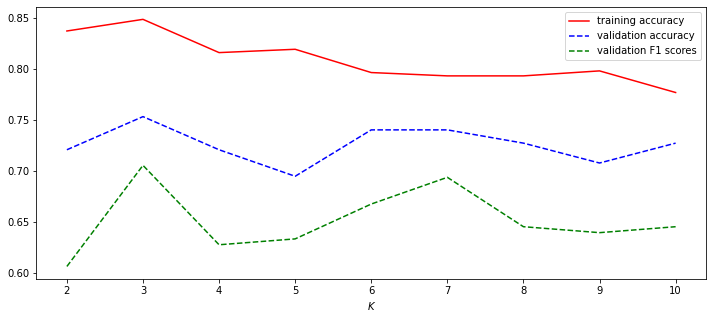

In [16]:
plt.figure(figsize=(12, 5))

plt.plot(k_values, training_accuracy, 'r', label='training accuracy')
plt.plot(k_values, validation_accuracy, 'b--', label='validation accuracy')
plt.plot(k_values, validation_f1score, 'g--', label='validation F1 scores')

plt.xlabel("$K$")

plt.legend()

# Example: **Airplane Accidents**

## Data

In [17]:
data_file = "/content/drive/MyDrive/AI-ML/supervised-learning-revision/Day2/data/airplane-accidents.csv"

In [18]:
airplanes_df = pd.read_csv(data_file)

In [19]:
airplanes_df.shape

(10000, 12)

In [20]:
airplanes_df.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


*Safety_Score*: How safe the plane was deemed to be before take-off?

*Days_Since_Inspection*: How many days since the last inspection before the accident?

*Total_Safety_Complaints*: Number of complaints from mechanics prior to the accident

*Control_Metric*: An estimate of how much control the pilot had during the incident

*Turbulence_In_gforces*: Recorded/estimated turbulence experienced during the accident

*Cabin_Temperature*: Last recorded temperature (in F) before the incident

*Accident_Type_Code*: the type of accident (factor, not numeric)

*Violations*: Number of violations that the aircraft received during inspections

*Accident_ID*: unique id assigned to each row

In [21]:
airplanes_X, airplanes_y = (airplanes_df.drop(["Severity", "Accident_ID"], axis=1),
                            airplanes_df.Severity)

In [22]:
airplanes_Xtrain, airplanes_Xtest, airplanes_ytrain, airplanes_ytest = train_test_split(airplanes_X,
                                                                                        airplanes_y,
                                                                                        test_size=0.2,
                                                                                        random_state=20130810)

In [24]:
airplanes_Xtrain, airplanes_Xvalid, airplanes_ytrain, airplanes_yvalid = train_test_split(airplanes_Xtrain,
                                                                                          airplanes_ytrain,
                                                                                          test_size=0.2,
                                                                                          random_state=20130810)

In [25]:
sc = StandardScaler()

In [26]:
airplanes_scaledXtrain = sc.fit_transform(airplanes_Xtrain)

airplanes_scaledXvalid = sc.transform(airplanes_Xvalid)
airplanes_scaledXtest = sc.transform(airplanes_Xtest)

## Model 1

In [27]:
learner_knn = KNeighborsClassifier(n_neighbors=3)

In [28]:
learner_knn.fit(airplanes_scaledXtrain, airplanes_ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [29]:
%%time

learner_knn.score(airplanes_scaledXvalid,
                  airplanes_yvalid)

CPU times: user 135 ms, sys: 0 ns, total: 135 ms
Wall time: 138 ms


0.67875

In [30]:
airplanes_yvalid.value_counts()

Highly_Fatal_And_Damaging                  501
Significant_Damage_And_Serious_Injuries    454
Minor_Damage_And_Injuries                  373
Significant_Damage_And_Fatalities          272
Name: Severity, dtype: int64

In [ ]:
confusion_matrix(airplanes_yvalid,
                 learner_knn.predict(airplanes_scaledXvalid))

array([[373,  42,  19,  67],
       [ 50, 254,  13,  56],
       [ 42,  59, 159,  12],
       [104,  42,   8, 300]])

In [31]:
print(classification_report(airplanes_yvalid,
                            learner_knn.predict(airplanes_scaledXvalid)))

                                         precision    recall  f1-score   support

              Highly_Fatal_And_Damaging       0.66      0.74      0.70       501
              Minor_Damage_And_Injuries       0.64      0.68      0.66       373
      Significant_Damage_And_Fatalities       0.80      0.58      0.68       272
Significant_Damage_And_Serious_Injuries       0.69      0.66      0.67       454

                               accuracy                           0.68      1600
                              macro avg       0.70      0.67      0.68      1600
                           weighted avg       0.69      0.68      0.68      1600



In [ ]:
f1_score(airplanes_yvalid,
         learner_knn.predict(airplanes_scaledXvalid),
         average='macro')

0.6767528481592124

## Model 2

In [32]:
k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]
training_accuracy, validation_accuracy, validation_f1score = [], [], []

In [33]:
%%time
for k in k_values:
  learner_knn = KNeighborsClassifier(n_neighbors=k)
  learner_knn.fit(airplanes_scaledXtrain, airplanes_ytrain)

  training_accuracy.append(learner_knn.score(airplanes_scaledXtrain,
                                             airplanes_ytrain))

  validation_accuracy.append(learner_knn.score(airplanes_scaledXvalid, 
                                               airplanes_yvalid))
  
  validation_f1score.append(f1_score(airplanes_yvalid,
                                     learner_knn.predict(airplanes_scaledXvalid),
                                     average='macro')) 

CPU times: user 8.17 s, sys: 2.07 ms, total: 8.17 s
Wall time: 8.15 s


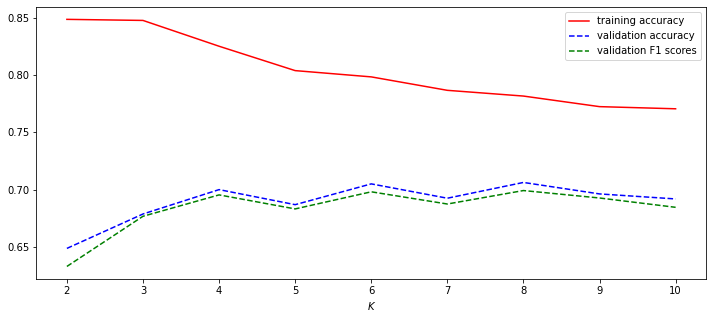

In [34]:
plt.figure(figsize=(12, 5))

plt.plot(k_values, training_accuracy, 'r', label='training accuracy')
plt.plot(k_values, validation_accuracy, 'b--', label='validation accuracy')
plt.plot(k_values, validation_f1score, 'g--', label='validation F1 scores')

plt.xlabel("$K$")

plt.legend()

In [35]:
pd.DataFrame({'k': k_values,
              'training_accuracy': training_accuracy,
              'validation_accuracy': validation_accuracy,
              'validation_f1score': validation_f1score})

,k,training_accuracy,validation_accuracy,validation_f1score
0,2,0.848437,0.648750,0.633018
1,3,0.847500,0.678750,0.676753
2,4,0.825000,0.700000,0.695395
3,5,0.803750,0.686875,0.683171
4,6,0.798281,0.705000,0.698091
5,7,0.786563,0.692500,0.687447
6,8,0.781563,0.706250,0.699183
7,9,0.772344,0.696250,0.692693
8,10,0.770469,0.691875,0.684567


# Example: **Fashion MNIST**

## Data

In [ ]:
fashion_mnist_train = pd.read_csv("/content/drive/MyDrive/AI-ML/supervised-learning-revision/Day1/data/fashion-mnist_train.csv")

In [ ]:
fashion_X, fashion_y = (fashion_mnist_train.drop('label', axis=1), 
                        fashion_mnist_train.label)

In [ ]:
fashion_Xtrain, fashion_Xvalid, fashion_ytrain, fashion_yvalid = train_test_split(fashion_X,
                                                                                  fashion_y,
                                                                                  test_size=0.2,
                                                                                  random_state=20130810)

In [ ]:
sc = StandardScaler()

fashion_scaledXtrain = sc.fit_transform(fashion_Xtrain)
fashion_scaledXvalid = sc.transform(fashion_Xvalid)

## Model 1

In [ ]:
learner_knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
%%time
learner_knn.fit(fashion_scaledXtrain, fashion_ytrain)

CPU times: user 11.1 s, sys: 22.3 ms, total: 11.1 s
Wall time: 11.1 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
%%time
learner_knn.score(fashion_scaledXvalid, fashion_yvalid)

CPU times: user 16min 48s, sys: 783 ms, total: 16min 48s
Wall time: 16min 43s


0.8548333333333333

In [ ]:
%%time
fashion_yvalid_preds = learner_knn.predict(fashion_scaledXvalid)

CPU times: user 16min 43s, sys: 847 ms, total: 16min 44s
Wall time: 16min 39s


In [ ]:
fashion_yvalid.value_counts()

0    1239
6    1235
1    1230
2    1201
8    1196
9    1192
3    1187
7    1180
5    1170
4    1170
Name: label, dtype: int64

In [ ]:
confusion_matrix(fashion_yvalid,
                 fashion_yvalid_preds)

array([[1069,    1,   19,   28,    3,    0,  112,    0,    6,    1],
       [  10, 1194,    3,   14,    2,    0,    7,    0,    0,    0],
       [  38,    2,  944,    7,  124,    0,   83,    0,    3,    0],
       [  69,    5,   11, 1032,   32,    0,   37,    0,    1,    0],
       [   9,    2,  135,   37,  896,    0,   90,    0,    1,    0],
       [   2,    0,    3,    0,    0, 1012,    6,   87,    0,   60],
       [ 227,    2,  168,   26,   85,    0,  722,    1,    4,    0],
       [   0,    0,    0,    0,    0,    4,    0, 1114,    1,   61],
       [  12,    0,   14,    7,    6,    2,   16,    9, 1127,    3],
       [   1,    0,    0,    1,    0,    7,    0,   35,    0, 1148]])

In [ ]:
print(classification_report(fashion_yvalid,
                            fashion_yvalid_preds))

              precision    recall  f1-score   support

           0       0.74      0.86      0.80      1239
           1       0.99      0.97      0.98      1230
           2       0.73      0.79      0.76      1201
           3       0.90      0.87      0.88      1187
           4       0.78      0.77      0.77      1170
           5       0.99      0.86      0.92      1170
           6       0.67      0.58      0.63      1235
           7       0.89      0.94      0.92      1180
           8       0.99      0.94      0.96      1196
           9       0.90      0.96      0.93      1192

    accuracy                           0.85     12000
   macro avg       0.86      0.86      0.86     12000
weighted avg       0.86      0.85      0.85     12000



In [ ]:
f1_score(fashion_yvalid,
         fashion_yvalid_preds,
         average="macro")

0.855179210488709

# Summary

KNN is severely limited by the prediction times